# NLP With Spacy

If you are doing NLP, you will need to use a library that will allow you to manage your different preprocessing needs. Spacy is an extremely powerful library for this task. 

To give you some context, this library has been designed to create an end-to-end NLP tool. I.e. from data preprocessing to the deployment of an algorithm. 

For our needs, we will look at how the library works on the preprocessing part. 

In [ ]:
import spacy
spacy.__version__

'2.2.4'

## RTFM
Getting Started: https://spacy.io/usage/spacy-101

## Import a Language

First of all, to get started in Spacy, you will need to import a language. Indeed each language has its own specificities. In fact, you won't be able to have universal preprocessing templates. 

Let's import English specificities

In [ ]:
nlp = spacy.load("en")

## Create a Doc object

Once you have imported your language, you can create a `Doc` object. This doc is your complete body of text. Once you have instantiated your doc, you will be able to use the full power of Spacy. 

In [ ]:
doc = nlp("Hello World! Don't do this. I am superman wherever you are in the world")


print("Tokens: {}".format([token.text for token in doc]))
print("Lemma: {}".format([token.lemma_ for token in doc]))
print("POS: {}".format([token.pos_ for token in doc]))
print("Tag: {}".format([token.tag_ for token in doc]))
print("Dependency Tag: {}".format([token.dep_ for token in doc]))
print("Indices: {}".format([token.i for token in doc]))
print("Shape: {}".format([token.shape_ for token in doc]))
print("Alpha Numeric: {}".format([token.is_alpha for token in doc]))
print("Numbers: {}".format([token.like_num for token in doc]))

Tokens: ['Hello', 'World', '!', 'Do', "n't", 'do', 'this', '.', 'I', 'am', 'superman', 'wherever', 'you', 'are', 'in', 'the', 'world']
Lemma: ['hello', 'World', '!', 'do', 'not', 'do', 'this', '.', '-PRON-', 'be', 'superman', 'wherever', '-PRON-', 'be', 'in', 'the', 'world']
POS: ['INTJ', 'PROPN', 'PUNCT', 'AUX', 'PART', 'AUX', 'DET', 'PUNCT', 'PRON', 'AUX', 'PROPN', 'ADV', 'PRON', 'AUX', 'ADP', 'DET', 'NOUN']
Tag: ['UH', 'NNP', '.', 'VB', 'RB', 'VB', 'DT', '.', 'PRP', 'VBP', 'NNP', 'WRB', 'PRP', 'VBP', 'IN', 'DT', 'NN']
Dependency Tag: ['compound', 'ROOT', 'punct', 'aux', 'neg', 'ROOT', 'dobj', 'punct', 'nsubj', 'ROOT', 'attr', 'advmod', 'nsubj', 'advcl', 'prep', 'det', 'pobj']
Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Shape: ['Xxxxx', 'Xxxxx', '!', 'Xx', "x'x", 'xx', 'xxxx', '.', 'X', 'xx', 'xxxx', 'xxxx', 'xxx', 'xxx', 'xx', 'xxx', 'xxxx']
Alpha Numeric: [True, True, False, True, False, True, True, False, True, True, True, True, True, True, True, True, True

In [ ]:
spacy.explain('PROPN')

'proper noun'

In [ ]:
spacy.explain('UH')

'interjection'

As you can see above, once we created our `doc`, we were able to extract : 

* **The tokens**: words, punctuations marks and other parts of the segmented text (rule-based)
* **The lemmatized tokens**: the base forms of words (“was” --> “be”, “rats” --> “rat”)
* **The part-of-speech tags**: types to tokens (noun, verb, ...)
* **The Tag**: The detailed part-of-speech tag
* **The dependency**: syntactic dependency labels, describing the relations between individual tokens (subbject, object, ...)
* **The shape**: The word shape – capitalization, punctuation, digits
* **The clues** to each token 
* Boolean that determine whether each token is an alpha character
* Booleans that determine whether each token look like numbers... 

Powerful, isn't it?

## Stop Words 

In NLP, stop words are all the linking words, articles and quantifiers that are widely used in a language but which are not in themselves meaningful.

For each language, you have a list of stop words made by spacy. 

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

{'wherever', 'forty', 'twenty', 'due', 'yourselves', 'only', 'either', '’re', 'wherein', 'they', 'go', 'serious', 'just', 'who', 'it', 'so', '‘ve', 'without', 'already', 'becomes', 'no', 'whoever', 'another', 'those', 'many', 'make', 'neither', 'several', 'yours', 'above', 'anyway', 'ourselves', 'nevertheless', '‘m', 'other', 'along', 'give', 'or', 'side', 'can', 'seems', 'these', 'through', 'always', 'put', 'do', 'down', 'mine', 'to', 'whence', 'whom', 'was', 'why', 'my', 'himself', 'all', 'hereby', 'hereupon', 'still', 'take', 'been', 'against', 'behind', 'is', 'therein', 'whatever', 'whose', "'s", 'under', 'whereby', 'during', '’ll', 'i', 'same', 'if', 'we', 'whither', 'together', 'hers', 'again', 'less', 'its', 'into', 'because', 'ours', 'next', 'could', 'some', 'most', 'nothing', 'everything', 'though', 'used', 'none', 'may', 'their', 'third', '‘re', 'a', 'have', 'cannot', 'herein', 'nine', 'him', 'thereafter', 'really', 'as', 'say', 'any', 'alone', 'anyhow', 'will', 'empty', 'whe

In [ ]:
[(token.text, token.is_stop) for token in doc]

[('Hello', False),
 ('World', False),
 ('!', False),
 ('Do', True),
 ("n't", True),
 ('do', True),
 ('this', True),
 ('.', False),
 ('I', True),
 ('am', True),
 ('superman', False),
 ('wherever', True),
 ('you', True),
 ('are', True),
 ('in', True),
 ('the', True),
 ('world', False)]

# WordCloud

One visualization that we do a lot when doing NLP is to create a word cloud. Although this is not directly present in Spacy, we thought it was important to show you how to create it via `wordcloud`.

In [ ]:
import matplotlib.pyplot as plt
import wordcloud
wd = wordcloud.WordCloud()
cloud = wd.generate(doc.text)

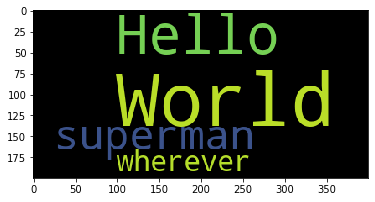

In [ ]:
plt.imshow(cloud)

Making a word cloud with stop words can hide important words in a body of text, so here's how you can remove them. 

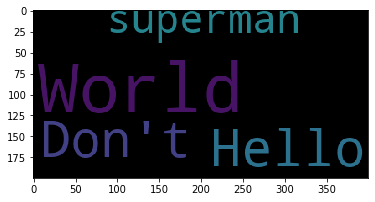

In [ ]:
wd = wordcloud.WordCloud(stopwords=STOP_WORDS)
cloud = wd.generate(doc.text)
plt.imshow(cloud)

## Visualize

Finally, an interesting feature of spacy is `displacy` which allows you to see all the relationships between words in a text corpus. Here's how you can use this visualization.

In [ ]:
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True,options={'distance': 70})

# Resources

* [Lemmatizer](https://spacy.io/api/lemmatizer)
* [Adding Languages](https://spacy.io/usage/adding-languages#lemmatizer)
* [SpaCy 101](https://spacy.io/usage/spacy-101)
* [Getting Started with spaCy for Natural Language Processing](https://www.kdnuggets.com/2018/05/getting-started-spacy-natural-language-processing.html)